In [1]:
#importar as bibliotecas
import pandas as pd



In [2]:
#Definir e baixar arquivo
def read_files(path, name_file, year_date, type_file):
    
    _file = f'{path}{name_file}{year_date}.{type_file}'
    
    colspecs = [(2,10),
                (10,12),
                (12,24),
                (27,39),
                (56,69),
                (69,82),
                (82,95),
                (108, 121),
                (152, 170),
                (170, 188)
            
    
    ]

    names = ['data_pregao', 'codbdi', 'sigla_acao', 'nome_acao', 'preco_abertura','preco_maximo', 'preco_minimo', 'preco_fechamento', 'qtd_negocios', 'volume_negocio']

    df = pd.read_fwf(_file, colspecs = colspecs, names = names, skiprows =1)

    return df



In [3]:
#filtrar ações

def filter_stocks(df): 
    df = df [df['codbdi']==2]
    df = df.drop(['codbdi'], 1)

    return df

In [4]:
#Ajuste campo de data
def parse_date(df):
    df['data_pregao'] = pd.to_datetime(df['data_pregao'], format ='%Y%m%d')
    return df

In [5]:
#Ajuste dos campos numericos

def parse_values(df):

    df['preco_abertura'] = (df['preco_abertura'] / 100).astype(float)
    df['preco_maximo'] = (df['preco_maximo'] / 100).astype(float)
    df['preco_minimo'] = (df['preco_minimo'] / 100).astype(float)
    df['preco_fechamento'] = (df['preco_fechamento'] / 100).astype(float)
    df['preco_fechamento'] = (df['preco_fechamento'] / 100).astype(float)
    df['qtd_negocios'] = (df['qtd_negocios'] / 100).astype(int)
    df['volume_negocio'] = (df['volume_negocio'] / 100).astype(int)

    return df

In [6]:
#Juntando os arquivos

def concat_files(path, name_file, year_date, type_file, final_file):
    
    for i, y in enumerate(year_date):
        df = read_files(path, name_file, y, type_file)
        df = filter_stocks(df)
        df = parse_date(df)
        df = parse_values(df)
        
        
        if i==0:
            df_final = df
        else:
            df_final = pd.concat([df_final, df])
            
        df_final.to_csv(f'{path}//{final_file}', index=False)

In [7]:
#Executando o proframa de etl

year_date = ['2019']

path =f'C://Users//Herla//OneDrive//Desktop//TCC//'

name_file= 'COTAHIST_A'

type_file= 'txt'

final_file= 'all_bovespa4.csv'

concat_files( path, name_file, year_date,type_file, final_file)


In [8]:
#importar as bibliotecas
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

In [9]:
df = pd.read_csv('C://Users//Herla//OneDrive//Desktop//TCC//all_bovespa.csv')
df

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocio
0,2020-01-02,AALR3,ALLIAR,18.29,19.00,18.28,0.1900,5858,10946196
1,2020-01-02,AAPL34,APPLE,120.00,121.34,120.00,1.2134,127,1533380
2,2020-01-02,ABCB4,ABC BRASIL,20.00,20.30,19.82,0.2030,8704,17457878
3,2020-01-02,ABEV3,AMBEV S/A,18.86,19.25,18.78,0.1920,160113,306234791
4,2020-01-02,ADHM3,ADVANCED-DH,2.55,2.55,2.35,0.0248,1934,471927
...,...,...,...,...,...,...,...,...,...
122221,2020-12-28,Z1TO34,ZTO EXPRESS,36.72,36.72,36.72,0.3672,0,1358
122222,2020-12-29,Z1TO34,ZTO EXPRESS,36.31,36.31,36.31,0.3631,1,3631
122223,2020-12-30,Z1TO34,ZTO EXPRESS,38.09,38.09,37.50,0.3750,0,2295
122224,2020-12-23,Z1TS34,ZOETIS INC,209.18,209.18,209.18,2.0918,0,10459


In [10]:
#filtrar ação
df_acao= df [df['sigla_acao'] == 'PETR4'] 
df_acao

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocio
262,2020-01-02,PETR4,PETROBRAS,30.51,30.70,30.31,0.3070,377745,1154777493
997,2020-01-03,PETR4,PETROBRAS,30.88,31.24,30.45,0.3045,715956,-2147483648
998,2020-01-06,PETR4,PETROBRAS,30.43,30.94,29.95,0.3081,818440,-2147483648
2550,2020-01-07,PETR4,PETROBRAS,30.82,30.88,30.47,0.3069,328220,1006115924
2551,2020-01-08,PETR4,PETROBRAS,30.69,30.77,30.24,0.3050,482156,1469849247
...,...,...,...,...,...,...,...,...,...
121075,2020-12-22,PETR4,PETROBRAS,27.20,27.47,27.05,0.2728,465132,1268321403
121076,2020-12-23,PETR4,PETROBRAS,27.43,28.25,27.35,0.2795,490389,1368938709
121077,2020-12-28,PETR4,PETROBRAS,28.36,28.52,28.18,0.2818,363133,1027840686
121078,2020-12-29,PETR4,PETROBRAS,28.38,28.43,27.99,0.2827,298911,843347519


In [11]:
#selecionar os campos
df_acao_fec = df_acao[['data_pregao', 'preco_fechamento']]
df_acao_fec

,data_pregao,preco_fechamento
262,2020-01-02,0.3070
997,2020-01-03,0.3045
998,2020-01-06,0.3081
2550,2020-01-07,0.3069
2551,2020-01-08,0.3050
...,...,...
121075,2020-12-22,0.2728
121076,2020-12-23,0.2795
121077,2020-12-28,0.2818
121078,2020-12-29,0.2827


In [12]:
#Ajustar o Index
df_acao_fec = df_acao_fec.set_index(pd.DatetimeIndex(df_acao_fec['data_pregao'].values))

In [13]:
df_acao_fec

,data_pregao,preco_fechamento
2020-01-02,2020-01-02,0.3070
2020-01-03,2020-01-03,0.3045
2020-01-06,2020-01-06,0.3081
2020-01-07,2020-01-07,0.3069
2020-01-08,2020-01-08,0.3050
...,...,...
2020-12-22,2020-12-22,0.2728
2020-12-23,2020-12-23,0.2795
2020-12-28,2020-12-28,0.2818
2020-12-29,2020-12-29,0.2827


In [10]:
#retirar coluna
df_acao_fec.drop('data_pregao', axis=1, inplace=True)
df_acao_fec

,preco_fechamento
2020-01-02,0.3070
2020-01-03,0.3045
2020-01-06,0.3081
2020-01-07,0.3069
2020-01-08,0.3050
...,...
2020-12-22,0.2728
2020-12-23,0.2795
2020-12-28,0.2818
2020-12-29,0.2827


C:\Users\Herla\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'data')

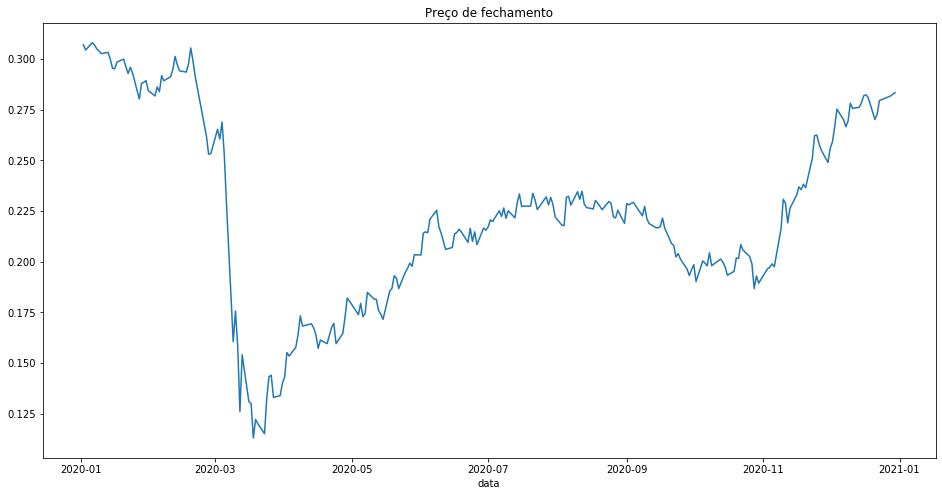

In [12]:
#plotar informação
plt.figure(figsize=(16,8))
plt.title('Preço de fechamento')
plt.plot(df_acao_fec['preco_fechamento'])
plt.xlabel('data')

In [13]:
#verificar a quantidade de linhas

qtd_linhas = len(df_acao_fec)

qtd_linhas_treino = round(.70 * qtd_linhas)

qtd_linhas_teste = qtd_linhas - qtd_linhas_treino

info =(
    f"linhas treino= 0:{qtd_linhas_treino}"
    f"linhas teste= {qtd_linhas_treino}:{qtd_linhas_treino + qtd_linhas_teste}"
)
info

'linhas treino= 0:174linhas teste= 174:249'

In [15]:
#Normalizando os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_acao_fec)

In [16]:
#separa em treino e teste

train = df_scaled[:qtd_linhas_treino]
test = df_scaled[qtd_linhas_treino: qtd_linhas_treino+qtd_linhas_teste]

print(len(train), len(test))

174 75


In [17]:
#Convertendo o array de valores dentro da matrix df
def create_df(df, steps=1):
    dataX, dataY = [], []
    for i in range(len(df)-steps-1):
        a= df[i:(i+steps), 0]
        dataX.append(a)
        dataY.append(df[i + steps, 0])
    return np.array(dataX), np.array(dataY)

In [18]:
#gerando dados de treino e teste
steps = 15
X_train, Y_train = create_df(train, steps)
X_test, Y_test = create_df(test, steps)

In [19]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(X_test.shape)

(158, 15)
(158,)
(59, 15)
(59, 15)


In [20]:
#gerando os dados que o modelo espera
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [21]:
#montando a rede
model = Sequential()
model.add(LSTM(35, return_sequences=True, input_shape=(steps, 1)))
model.add(LSTM(35, return_sequences=True))
model.add(LSTM(35))
model.add(Dropout(0.2))
model.add(Dense(1))

In [22]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 15, 35)            5180      
_________________________________________________________________
lstm_1 (LSTM)                (None, 15, 35)            9940      
_________________________________________________________________
lstm_2 (LSTM)                (None, 35)                9940      
_________________________________________________________________
dropout (Dropout)            (None, 35)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 36        
Total params: 25,096
Trainable params: 25,096
Non-trainable params: 0
_________________________________________________________________


In [23]:
#Treinamento do modelo
validation = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=15, verbose=2)

Epoch 1/100
11/11 - 12s - loss: 0.8460 - val_loss: 0.3761
Epoch 2/100
11/11 - 0s - loss: 0.5032 - val_loss: 0.2819
Epoch 3/100
11/11 - 0s - loss: 0.4255 - val_loss: 0.2292
Epoch 4/100
11/11 - 0s - loss: 0.3790 - val_loss: 0.2334
Epoch 5/100
11/11 - 0s - loss: 0.3511 - val_loss: 0.2089
Epoch 6/100
11/11 - 0s - loss: 0.2855 - val_loss: 0.1639
Epoch 7/100
11/11 - 0s - loss: 0.2569 - val_loss: 0.1337
Epoch 8/100
11/11 - 0s - loss: 0.2217 - val_loss: 0.1246
Epoch 9/100
11/11 - 0s - loss: 0.1661 - val_loss: 0.1297
Epoch 10/100
11/11 - 0s - loss: 0.1358 - val_loss: 0.0992
Epoch 11/100
11/11 - 0s - loss: 0.1019 - val_loss: 0.0731
Epoch 12/100
11/11 - 0s - loss: 0.0914 - val_loss: 0.0537
Epoch 13/100
11/11 - 0s - loss: 0.0847 - val_loss: 0.0660
Epoch 14/100
11/11 - 0s - loss: 0.0823 - val_loss: 0.0719
Epoch 15/100
11/11 - 0s - loss: 0.0988 - val_loss: 0.0704
Epoch 16/100
11/11 - 0s - loss: 0.1181 - val_loss: 0.0997
Epoch 17/100
11/11 - 0s - loss: 0.0826 - val_loss: 0.0650
Epoch 18/100
11/11 - 0

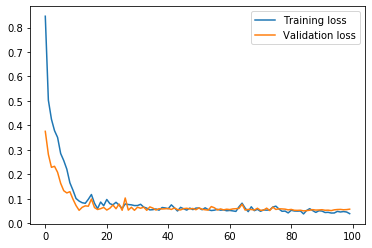

In [24]:
plt.plot(validation.history['loss'], label='Training loss')
plt.plot(validation.history['val_loss'], label='Validation loss')
plt.legend()

In [25]:
#Fazendo a previsão
prev= model.predict(X_test)
prev = scaler.inverse_transform(prev)
prev

array([[0.20259996],
       [0.2011585 ],
       [0.20033255],
       [0.20022005],
       [0.20064756],
       [0.20185347],
       [0.20293057],
       [0.20377004],
       [0.20455872],
       [0.20496666],
       [0.20505908],
       [0.20477419],
       [0.20447454],
       [0.20435204],
       [0.20484403],
       [0.20577824],
       [0.20647685],
       [0.20715904],
       [0.20686303],
       [0.2058099 ],
       [0.20444116],
       [0.20296831],
       [0.20199864],
       [0.2015367 ],
       [0.20140664],
       [0.20211484],
       [0.2043351 ],
       [0.2079882 ],
       [0.21192801],
       [0.21618713],
       [0.22033447],
       [0.22441676],
       [0.22826374],
       [0.23161155],
       [0.23457277],
       [0.23746653],
       [0.24099773],
       [0.24504709],
       [0.24914905],
       [0.25272256],
       [0.25586396],
       [0.25857523],
       [0.2606673 ],
       [0.262683  ],
       [0.2654342 ],
       [0.26858392],
       [0.27161324],
       [0.274

In [26]:
#Previsão para os próximos 10 dias
lenght_test = len(test)
lenght_test

75

In [27]:
#Pegar os últimos dias que são o tamanho d meu step
days_input_steps = lenght_test - steps
days_input_steps

60

In [28]:
# trasnforma em Array
input_steps = test[days_input_steps:]
input_steps = np.array(input_steps).reshape(1, -1)
input_steps


array([[0.94909559, 1.01017158, 1.20212468, 1.14759255, 1.15849897,
        1.20866853, 1.28283223, 1.29373866, 1.26320066, 1.02762186,
        1.08433528, 1.23048138, 1.28065094, 1.30028251, 1.31555151]])

In [29]:
#transformar em lista
list_output_steps = list(input_steps)
list_output_steps = list_output_steps[0].tolist()
list_output_steps

[0.9490955919862044,
 1.0101715779134337,
 1.2021246765418663,
 1.1475925462496979,
 1.1584989723081316,
 1.208668532176927,
 1.2828322293742767,
 1.293738655432709,
 1.2632006624690957,
 1.0276218596069269,
 1.084335275110782,
 1.2304813842937945,
 1.2806509441625888,
 1.3002825110677698,
 1.3155515075495765]

In [32]:
#loop para prever os próximos 10 dias
pred_output=[]
i=0
n_future=10
while(i<n_future):
    if (len(list_output_steps) > steps):
        
        input_steps = np.array(list_output_steps[1:])
        print("{} dia. Valores de entrada -> {}".format(i, input_steps))
        input_steps = input_steps.reshape(1, -1)
        input_steps = input_steps.reshape((1, steps,1))
        #print(input_steps)
        pred = model.predict(input_steps, verbose=0)
        print ("{} dia. Valor previsto -> {}".format(i, pred))
        list_output_steps.extend(pred[0].tolist())
        list_output_steps=list_output_steps[1:]
        #print(list_output_steps)
        pred_output.extend(pred.tolist())
        i=i+1
    else:
        input_steps = input_steps.reshape(1,steps,1)
        pred = model.predict(input_steps, verbose=0)
        print(pred[0])
        list_output_steps.extend(pred[0].tolist())
        print(len(list_output_steps))
        pred_output.extend(pred.tolist())
        i=i+1
print(pred_output)

0 dia. Valores de entrada -> [1.20212468 1.14759255 1.15849897 1.20866853 1.28283223 1.29373866
 1.26320066 1.02762186 1.08433528 1.23048138 1.28065094 1.30028251
 1.31555151 1.51512849 1.56295252]
0 dia. Valor previsto -> [[1.6121198]]
1 dia. Valores de entrada -> [1.14759255 1.15849897 1.20866853 1.28283223 1.29373866 1.26320066
 1.02762186 1.08433528 1.23048138 1.28065094 1.30028251 1.31555151
 1.51512849 1.56295252 1.61211979]
1 dia. Valor previsto -> [[1.6349854]]
2 dia. Valores de entrada -> [1.15849897 1.20866853 1.28283223 1.29373866 1.26320066 1.02762186
 1.08433528 1.23048138 1.28065094 1.30028251 1.31555151 1.51512849
 1.56295252 1.61211979 1.63498545]
2 dia. Valor previsto -> [[1.6375501]]
3 dia. Valores de entrada -> [1.20866853 1.28283223 1.29373866 1.26320066 1.02762186 1.08433528
 1.23048138 1.28065094 1.30028251 1.31555151 1.51512849 1.56295252
 1.61211979 1.63498545 1.63755012]
3 dia. Valor previsto -> [[1.6114182]]
4 dia. Valores de entrada -> [1.28283223 1.29373866 

In [33]:
#Transforma a saída
prev = scaler.inverse_transform(pred_output)
prev = np.array(prev).reshape(1, -1)
list_output_prev = list(prev)
list_output_prev = prev[0].tolist()
list_output_prev

[0.29699603433578503,
 0.29804429950145506,
 0.2981618755360632,
 0.29696387225696796,
 0.29452033031023883,
 0.29131829888265076,
 0.28828897535901765,
 0.2859277650550035,
 0.2849432447469922,
 0.28457788681068746]

In [35]:
#pegar as datas de previsão
dates = pd.to_datetime(df_acao['data_pregao'])
predict_dates = pd.date_range(list(dates)[-1] + pd.DateOffset(1), periods=10, freq='b').tolist()
predict_dates

[Timestamp('2020-12-31 00:00:00', freq='B'),
 Timestamp('2021-01-01 00:00:00', freq='B'),
 Timestamp('2021-01-04 00:00:00', freq='B'),
 Timestamp('2021-01-05 00:00:00', freq='B'),
 Timestamp('2021-01-06 00:00:00', freq='B'),
 Timestamp('2021-01-07 00:00:00', freq='B'),
 Timestamp('2021-01-08 00:00:00', freq='B'),
 Timestamp('2021-01-11 00:00:00', freq='B'),
 Timestamp('2021-01-12 00:00:00', freq='B'),
 Timestamp('2021-01-13 00:00:00', freq='B')]

In [37]:
#cria dataframe de previsão

forecast_dates =[]
for i in predict_dates:
    forecast_dates.append(i.date())
    
df_forecast = pd.DataFrame({'data_pregao': np.array(forecast_dates), 'preco_fechamento': list_output_prev})
df_forecast['data_pregao'] = pd.to_datetime(df_forecast['data_pregao'])

df_forecast=df_forecast.set_index(pd.DatetimeIndex(df_forecast['data_pregao'].values))
df_forecast.drop('data_pregao', axis=1, inplace=True)
df_forecast


,preco_fechamento
2020-12-31,0.296996
2021-01-01,0.298044
2021-01-04,0.298162
2021-01-05,0.296964
2021-01-06,0.294520
2021-01-07,0.291318
2021-01-08,0.288289
2021-01-11,0.285928
2021-01-12,0.284943
2021-01-13,0.284578


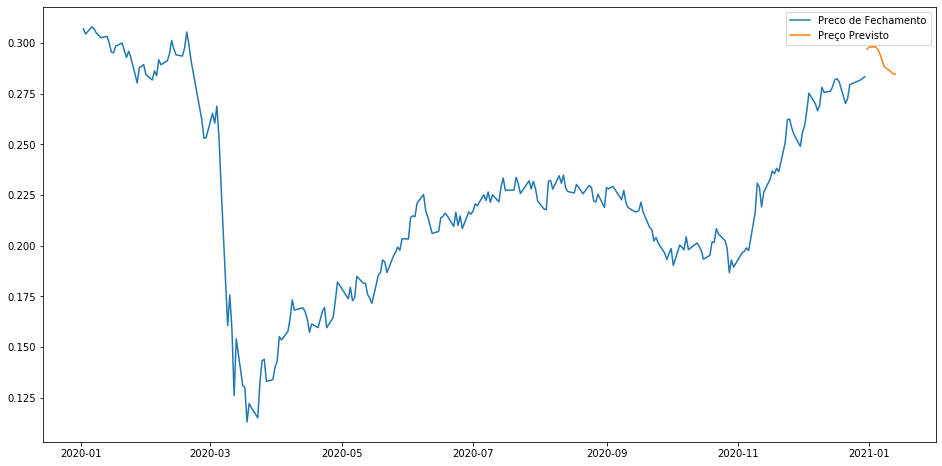

In [39]:
#plotar o gráfico
plt.figure(figsize=(16,8))
plt.plot(df_acao_fec['preco_fechamento'])
plt.plot(df_forecast['preco_fechamento'])
plt.legend(['Preco de Fechamento', 'Preço Previsto'])
plt.show()